# <center>SUJET No 7</center>


## Nom : 
## Prénom :



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exercice 1

Le menu d'un nourisson est composé de lait et de compote. 
+ Une mesure de lait fournit $l_A$ kcal, $l_B$ mg de vitamine B et $l_C$ mg de vitamine C. 
+ Une mesure de compote fournit $c_A$ kcal, $c_B$ mg de vitamine B et $c_C$ mg de vitamine C. 

Les besoins du nourisson sont d’au moins $A$ kcal, $B$ mg de vitamine B et $C$ mg de vitamine C. 
Une mesure de compote coûte autant que $m$ mesures de lait. On souhaite savoir quel menu coûte le moins cher ?

Si on note $x_L$ le nombre de mesures de lait et $x_C$ le nombre de mesures de compote du menu, on doit résoudre le problème d'optimisation suivant :

$$
(P)\quad\left\{
\begin{array}{ll}
\min                          & x_L+m.x_C
\\
\mbox{sous les contraintes :} & l_A.x_0 + c_A.x_1 \geq A\\
                              & l_B.x_0 + c_B.x_1 \geq B\\
                              & l_C.x_0 + c_C.x_1 \geq C\\
                              & x_L, x_C\geq 0
\end{array}
\right.
$$

On prendra les valeurs numériques suivantes :

$$
\begin{array}{lll}
A=2 & B=6 & C=2\\
l_A=2 & l_B=4 & l_C=1\\
c_A=1 & c_B=5 & c_C=3\\
m=2 &&
\end{array}
$$

## a - Ecriture matricielle

En notant $\mathbf{x}=\begin{pmatrix}x_L\\x_C\end{pmatrix}$, le problème ci-dessus peut être écrit sous la forme matricielle suivante :

$$
(P)\quad\left\{
\begin{array}{ll}
&\min \;\mathbf{c}\mathbf{x}\\
\mbox{s.c. :} & M\mathbf{x}\leq\mathbf{b}\\
&\mathbf{x}\geq\mathbf{0}
\end{array}
\right.
$$

Définir les variables c, M et b sous forme de tableaux numpy.

## a - Ecriture matricielle

En notant $\mathbf{x}=\begin{pmatrix}x_L\\x_C\end{pmatrix}$, le problème ci-dessus peut être écrit sous la forme matricielle suivante :

$$
(P)\quad\left\{
\begin{array}{ll}
&\min \;\mathbf{c}\mathbf{x}\\
\mbox{s.c. :} & M\mathbf{x}\leq\mathbf{b}\\
&\mathbf{x}\geq\mathbf{0}
\end{array}
\right.
$$

Définir les variables c, M et b sous forme de tableaux numpy.

## b - Résolution graphique

Tracer toutes les contraintes du problème (P), les contours de sa fonction objectif et en déduire une valeur (au moins approximative) de la solution $(x_E^*,x_S^*)$ de $(P)$.

On limitera l'étendue des valeurs de $x_E$ à l'intervalle $[0,1.4]$ et celles de $x_S$ à l'intervalle $[0,2]$ et on tracera 20 courbes de niveau.

     con: array([], dtype=float64)
     fun: 1.7142857142857144
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.57142857, 0.        , 0.        ])
  status: 0
 success: True
       x: array([1.14285714, 0.28571429])

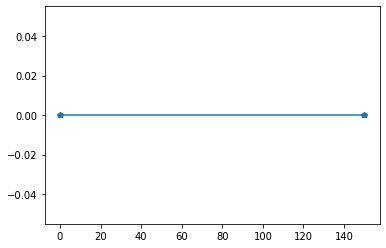

In [31]:
c = np.array([1,2])

b = np.array([-2,-6,-2])
M = np.array([[-2,-1],
               [-4,-5],
               [-1,-3]]
               )


xmax = 150
ymax = 500
xx = np.arange(xmax)
yy = np.arange(ymax)

profit1 = 1
profit2 = 2

plt.plot([0, 150], [0, 0], 'p-', label = 'Positivité')

from scipy.optimize import linprog
res= linprog(c, A_ub = M, b_ub = b, method='revised simplex', 
                  bounds = ((0,None),(0,None)))
res

#### <u>Ecrivez ici votre solution graphique</u> : 

## c - Résolution précise

Trouver la solution de $(P)$ en utilisant la fonction **linprog** de la librairie **scipy.optimize** et comparer au résultat approximatif obtenu ci-dessus.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'color'


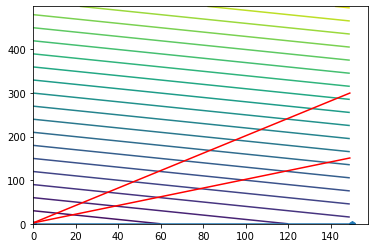

In [69]:
xmax = 150
ymax = 500
xx = np.arange(xmax)
yy = np.arange(ymax)

profit1 = 1
profit2 = 2

plt.plot([0, 150], [0, 0], 'p-', label = 'Positivité')


plt.plot(xx, (2 +2*xx), 'r-' , label = 'lait' )
plt.plot(xx, (2 +1*xx), 'r-' , label = 'compote' )


X, Y = np.meshgrid(xx, yy) 
Z = (profit1)*X + (profit2)*Y
plt.contour(X, Y, Z, 20, color = 'c')

# Exercice 2

Soit la fonction suivante définie de $\mathbb{R}^2$ dans $\mathbb{R}$ :

$$
q(x) = k_1(x_1+a_1)^4 + k_2(x_1+a_2)^2x_2^2+k_3(x_2+a_3)^2.
$$

avec \begin{array}{|c|c|c|}
\hline
k_1=1 & k_2=1 & k_3=1\\
\hline
a_1=-2 & a_2=-2 & a_3=1\\
\hline
\end{array}

On considère le problème d'optimisation suivant :
$$
(Q)\quad \displaystyle\min_{x\in\mathbb{R}^2} q(x).
$$

## a) Calculs préliminaires

Ecrire trois fonctions
+ **q(x)**
+ **dq(x)**
+ **hq(x)**

qui retournent respectivement la valeur, le gradient et la matrice hessienne en $x$ de la fonction $q$ définie ci-dessus.

Attention : on demande ici les expressions <u>exactes</u> du gradient et de la hessienne et non pas leur approximation numérique.

In [9]:
def q(x):
  x1 = x[0]
  x2 = x[1]
  return (x1-2)**4 + (x1-2)**2 * x2**2 +(x2+1)**2

def dq(x):
  x1 = x[0]
  x2 = x[1]
  dfx1 = 4*(x1-2)**2 +2*(x1-2)*x2**2
  dfx2 = 2*x2*(x1-2)**2+ 2*(x2+1)
  return np.array([dfx1,dfx2])


def hq(x):
  x1 = x[0]
  x2 = x[1]
  h = zeros([2,2])
  h[0,0] = 12*(x1-2)**2+2*x2**2
  h[0,1] = 4*x2*(x1-2)
  h[1,0] = 4*x2*(x1-2)
  h[1,1] = 2*(x1-2)**2
  return h


## b) Méthode du gradient à pas fixe

### b-1 : codage de l'algorithme

Ecrire une fonction **GPF(x0,f,df,alpha,itmax)** qui prend en entrée un point initial $x_0$, la fonction à minimiser $f$, son gradient $df$, le pas de déplacement $\alpha$ et le nombre d'itérations $itmax$. Cette fonction doit retourner  la liste des itérés $\left(x_k\right)_{k=1,itmax}$ de la méthode du gradient à pas fixe $\alpha$.

Vous pouvez réutiliser le code que vous avez écrit pendant les séances de TP.

In [7]:
def GPF(x0,f,df,alpha,itmax):
  x = copy(x0)
  n = len(x)
  iteres = zeros([n,itmax+1])
  fval = zeros(itmax+1)
  iteres[:,0] = x
  fval[0] = f(x)
  for k in range(itmax):
    d = -df(x)
    xnew = x + alpha*d
    x = xnew
    iteres[:,k+1] = x
    fval[k+1] = f(x)
  return iteres, fval



### b-2 : résolution de $(Q)$ par la méthode du gradient à pas fixe

Résoudre le problème $(Q)$ ci-dessus en utilisant la methode du gradient à pas fixe que vous venez de coder. Faites écrire le dernier itéré et la valeur de la fonction en ce point.

On prendra $\alpha=0.01$ et $itmax=200$ et on partira du point $x_0=\begin{pmatrix}0\\0\end{pmatrix}$.

In [29]:
x0=[0,0]
itmax=200
alpha=0.01
iteres, fval = GPF(x0, q,dq,alpha,itmax)
print(iteres,fval)

[[ 0.00000000e+000 -1.60000000e-001 -3.46606720e-001 -5.66802420e-001
  -8.30198163e-001 -1.15036130e+000 -1.54701541e+000 -2.04984589e+000
  -2.70542573e+000 -3.59061010e+000 -4.84043819e+000 -6.71187888e+000
  -9.74766954e+000 -1.52679630e+001 -2.71952553e+001 -6.12897503e+001
  -2.21495341e+002 -1.82076130e+003  3.23904604e+009 -2.54149283e+025
   8.77989099e+075 -5.06179912e+224              nan              nan
               nan              nan              nan              nan
               nan              nan              nan              nan
               nan              nan              nan              nan
               nan              nan              nan              nan
               nan              nan              nan              nan
               nan              nan              nan              nan
               nan              nan              nan              nan
               nan              nan              nan              nan
               nan  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


### b-3 : Courbes de niveau et suite des itérés

Sur un même graphe, tracer les contours de la fonction objectif $q$ ainsi que les itérés obtenus par la méthode du gradient à pas fixe ci-dessus.

On limitera l'étendue des valeurs de $x_1$ à l'intervalle $[0,+3]$ et celles de $x_2$ à l'intervalle $[-2,+1]$ et on tracera 100 courbes de niveau.

<Figure size 432x288 with 0 Axes>

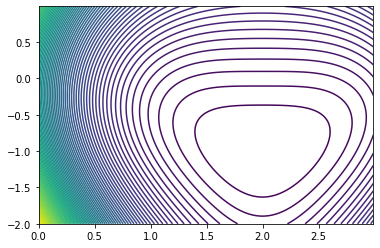

<Figure size 432x288 with 0 Axes>

In [23]:
xx = arange(0,3,0.01)
yy = arange(-2,1,0.01)
x1, x2 = np.meshgrid(xx, yy)
Z = q([x1,x2])
contour(x1, x2, Z, 100) #100 courbe de niveai
figure()

### b-4 : norme du gradient

Tracer maintenant l'évolution de la norme du gradient $\|\nabla f(x_k)\|$ en fonction du numéro d'itérations. On prendra une échelle linéaire pour les abscisses et logarithmique pour les ordonnées.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


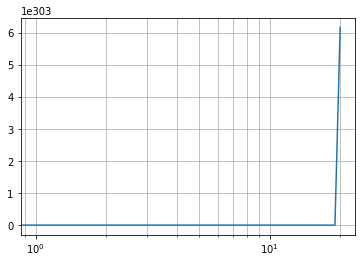

In [30]:
iteres, fval = GPF(x0, q,dq,alpha,itmax)
figure()
plot(fval)
xscale('log')
grid(True, which = "both")
show()

## c) Méthode de Newton

On rappelle que la méthode de Newton pour minimiser une fonction $f : \mathbb{R}^n \to \mathbb{R}$ consiste à se donner un point de départ $x_0 \in \mathbb{R}^n$
et à construire la suite suivante :

$$
x_{k+1} = x_k+\alpha_kd_k 
$$

où la direction de Newton $d_k$ est solution du système linéaire suivant :

$$
\nabla^2 f(x_k) d_k = -\nabla f(x_k).
$$

dans lequel $\nabla^2 f(x_k)$ désigne la matrice hessienne de $f$ en $x_k$.

### c-1 : codage de l'algorithme
Ecrire une fonction **Newton(f,df,hf,x0,alpha,tolg,itmax)** qui construit la suite décrite ci-dessus pour une fonction nommée **f**, dont le gradient et la matrice hessienne sont calculés en appelant respectivement **df** et **hf**. On partira du point de départ **x0** et on arrêtera la construction de la suite si on atteint le nombre maximum d'itérations **itmax** ou bien si la norme du gradient $\|\nabla f(x_k)\|$ est inférieure à **tolg**. Le pas de de déplacement dans la direction de Newton est constant et égal à **alpha**.

Cette fonction devra retourner la liste de tous les itérés calculés ainsi que la liste des normes du gradient $\|\nabla f(x_k)\|$.

Indication : on pourra utiliser [linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) pour résoudre le système linéaire $\nabla^2 f(x_k) d_k = -\nabla f(x_k)$.

In [86]:
def Newton(x0,df,hf,alpha,tolg,itmax):
  x = copy(x0)
  n = len(x)
  iteres = zeros([n,itmax+1])
  dfval = []
  iteres[:,0] = x
  dfval.append(df(x))
  k=0
  while k <=itmax or norm(df[x],ord=inf)> tolg:
    x1=hf(x)
    print(x1.shape)
    x2=df[x]

    a= [x1,x2]
    b=0
    d = np.linalg.solve(a, b)
    xnew = x + alpha*d
    x = xnew
    iteres[:,k+1] = x
    dfval.append(df(x))
  return iteres, dfval



### c-2 : résolution de $(Q)$ par la méthode de Newton

Mettre en oeuvre méthode de Newton que vous venez de coder pour résoudre le problème $(Q)$. On prendra comme critères d'arrêt $\|\nabla f(x_k)\|<10^{-12}$ et $itmax=10$. La valeur du pas de déplacement est constante et fixée à $\alpha=1$.

On partira du point de départ $x_0=\begin{pmatrix}0\\0\end{pmatrix}$ et on fera afficher l'optimum trouvé.

In [79]:
dq(x0)

array([16,  2])

In [87]:
x0=[0,0]
itmax=10
tolg=1e-12
alpha=1
iteres,dfval=Newton(x0,dq,hq,alpha,tolg,itmax)

(2, 2)


TypeError: ignored

### c-3 : norme du gradient

Tracer maintenant l'évolution de la norme du gradient $\|\nabla f(x_k)\|$ en fonction du numéro d'itération k.

[0. 0.] --> [nan nan]


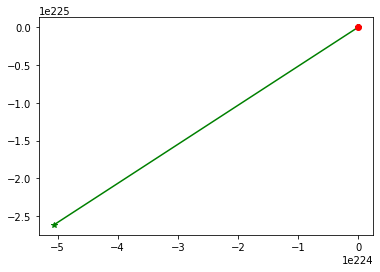

In [76]:
print(iteres[:,0],'-->',iteres[:,-1])
figure()
plot(iteres[0,:],iteres[1,:],'*g-' )
plot([1],[1],'or')
